### Lets understand the batch-norm 


> **why do we need  batch-norm ?**

- When we train large neural networks, normalizing data helps in achieving stable and better training. 

- Normalized data typically means having a mean of 0 and a standard deviation of 1.

- If the data is not normalized, we can't use a large learning rate effectively. 

- This can lead to non-convergence or the training process taking a lot longer to complete properly.

- Normally, we normalize the inputs to the network to ensure that the data is well-behaved and the training is more efficient.

- In Batch Normalization, we normalize the inputs of the activation function, not just the initial input data. This helps in several ways:

  - internal covariate shift 

  - gradient shattering (of resnet)


> **what is Covariate shift ?**

- example : - if we train the model of image classification of rose or not rose but with only images of red roses and at time of testing we provide the images of roses with diff colour then model might not recosined it. (high level example)

> **Internal Covariate Shift:**

- Internal covariate shift refers to the change in the distribution of network activations due to the updating of network parameters during training.

- Batch normalization helps to reduce this internal covariate shift by normalizing the output of each layer to have a mean of zero and a variance of one.

- By normalizing the inputs of each layer, batch normalization ensures that the distribution of the activations remains consistent during training, which helps in stabilizing and speeding up the training process.

- only first layer in network gets input from the data.(then weights get applied)

- then every other layer in netwok gets input from the previous layer.(the inputs depends on the values of WEIGHTS)

- means the distriubuition of the inputs is constantly changing due to the training become unstable.

- batch-norm make sure that the inputs become nomalise so training can become stable.


> **How Batch-Norm work ?**


- Data should be fed for training in mini-batches.

- Batch Normalization is applied layer by layer in the network.
- In a forward pass, data goes through: data -> linear transformation -> activation -> output (y).
- With Batch Normalization, the process becomes: data -> linear transformation -> batch-norm -> activation -> output (y).
- We do not use Batch Normalization after activation functions like ReLU because ReLU only passes positive inputs, which changes the distribution of data.
- To calculate Batch Normalization, we need the mean and standard deviation.
- We calculate the mean and standard deviation from a batch of data (that's why we need the data in batches).
- Training data is divided into mini-batches to make computation more efficient and to stabilize the training process by averaging out noise in the gradient updates.
- Batch Normalization is applied to the inputs of each layer, ensuring that the inputs to activation functions are normalized.

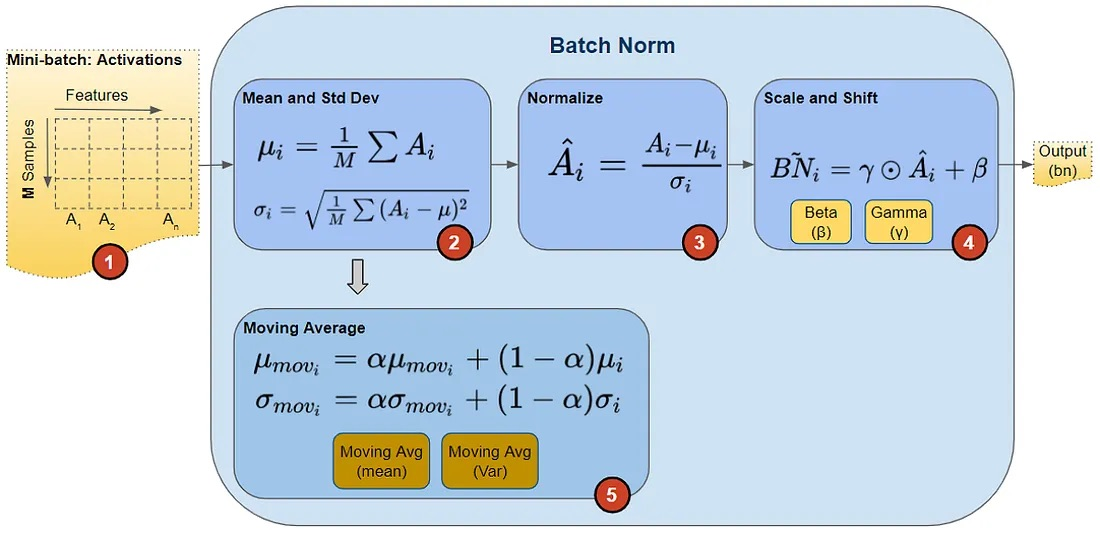

***Three Steps***

- 1.Calculate mean and standard deviation

- 2.Normalize using mean and standard deviation

- 3.Scale and shift using gamma and beta

- The gamma and beta are learnable parameters.
- each neuron will have its own gamma and beta.
- Generally, the default values are set as gamma = 1 and beta = 0 in most libraries.
- The question is, why do we need it?
- BatchNorm basically scales the data points into the same distribution.
- But in some cases, the model doesn't need every data point in the same range, so it adjusts using these parameters.
- These are updated by gradient descent, just like weights and biases.


---

> **lets manually calculate the batch norm with 5 mini-batch size and two neuron**

Neuron 1: 1, 2, 3, 4, 5
Neuron 2: 2, 4, 6, 8, 10

**1. Calculate Mean for Each Neuron:**
* Mean1 = (1 + 2 + 3 + 4 + 5) / 5 = 15 / 5 = 3
* Mean2 = (2 + 4 + 6 + 8 + 10) / 5 = 30 / 5 = 6

**2. Calculate Variance for Each Neuron:**
* Var1 = [(1 - 3)^2 + (2 - 3)^2 + (3 - 3)^2 + (4 - 3)^2 + (5 - 3)^2] / 5 = (4 + 1 + 0 + 1 + 4) / 5 = 10 / 5 = 2
* Var2 = [(2 - 6)^2 + (4 - 6)^2 + (6 - 6)^2 + (8 - 6)^2 + (10 - 6)^2] / 5 = (16 + 4 + 0 + 4 + 16) / 5 = 40 / 5 = 8

**3. Calculate Standard Deviation for Each Neuron:**
* Std1 = sqrt(Var1) = sqrt(2) ≈ 1.41
* Std2 = sqrt(Var2) = sqrt(8) ≈ 2.83

**4. Normalize Each Neuron's Data:**
* Norm_x1 = (x1 - Mean1) / Std1
  * Norm_x1 = [(1 - 3) / 1.41, (2 - 3) / 1.41, (3 - 3) / 1.41, (4 - 3) / 1.41, (5 - 3) / 1.41]
  * Norm_x1 ≈ [-1.41, -0.71, 0, 0.71, 1.41]
* Norm_x2 = (x2 - Mean2) / Std2
  * Norm_x2 = [(2 - 6) / 2.83, (4 - 6) / 2.83, (6 - 6) / 2.83, (8 - 6) / 2.83, (10 - 6) / 2.83]
  * Norm_x2 ≈ [-1.41, -0.71, 0, 0.71, 1.41]

**5. Scale and Shift (Using learnable parameters gamma and beta):**
* Let's assume gamma1 = 1, beta1 = 0 for Neuron 1
* Let's assume gamma2 = 1, beta2 = 0 for Neuron 2
* BN_x1 = gamma1 * Norm_x1 + beta1
  * BN_x1 = [1 * -1.41 + 0, 1 * -0.71 + 0, 1 * 0 + 0, 1 * 0.71 + 0, 1 * 1.41 + 0]
  * BN_x1 ≈ [-1.41, -0.71, 0, 0.71, 1.41]
* BN_x2 = gamma2 * Norm_x2 + beta2
  * BN_x2 = [1 * -1.41 + 0, 1 * -0.71 + 0, 1 * 0 + 0, 1 * 0.71 + 0, 1 * 1.41 + 0]
  * BN_x2 ≈ [-1.41, -0.71, 0, 0.71, 1.41]

---

> **Batch Normalization During Testing**

- During training, Batch Normalization uses the mean and standard deviation calculated from the current mini-batch.

- However, during testing, we don't have mini-batches like in training, and using batch-specific statistics would be inconsistent.
- Instead, Batch Normalization uses running averages of the means and variances that were calculated during training.
- These running averages are computed over all mini-batches seen during training, providing a stable estimate of the mean and variance for each layer.

> **Why Apply Batch Normalization During Testing?**

- Consistency: Using the running averages ensures that the data distribution during testing matches the distribution seen during training.

- Stability: It helps maintain the stability of the model's predictions since the test data is normalized in a manner consistent with the training data.
- Performance: It allows the model to make accurate predictions by ensuring that the inputs to each layer are scaled and shifted appropriately, just as they were during training.

- the 5th process in fig.(calculating the exp weight moving avg)

- through that formula we calculat it during training for testing.

> **Extra**

- batch-norm make smooth learining curve. 

- means stable and efficient training.

---


### Code 

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the model with batch normalization
class NetWithBN(nn.Module):
    def __init__(self):
        super(NetWithBN, self).__init__()
        #self.drop = nn.Dropout(0.2)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        

    def forward(self, x):
        #x= self.drop(x)
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64*7*7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the model without batch normalization
class NetWithoutBN(nn.Module):
    def __init__(self):
        super(NetWithoutBN, self).__init__()
        #self.drop = nn.Dropout(0.2)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        #x= self.drop(x)
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64*7*7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [5]:
# Load MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11151158.37it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 394341.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3678352.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2679022.47it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# Training function
def train_model(model, train_loader, test_loader, epochs=5, lr=0.001):
    model.to(device)  # Move model to GPU
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_acc = []
    test_acc = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = correct / total
        train_acc.append(train_accuracy)

        # Print loss and accuracy for this epoch
        print(f'Epoch {epoch+1}/{epochs}')
        print(f'Train Loss: {running_loss/len(train_loader):.4f}')
        print(f'Train Accuracy: {train_accuracy:.4f}')

        # Test the model
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)  # Move data to GPU
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = correct / total
        test_acc.append(test_accuracy)
        print(f'Test Accuracy: {test_accuracy:.4f}\n')

    return train_acc, test_acc


# Train models
model_with_bn = NetWithBN()
model_without_bn = NetWithoutBN()

train_acc_bn, test_acc_bn = train_model(model_with_bn, train_loader, test_loader, epochs=50)




Epoch 1/50
Train Loss: 0.1188
Train Accuracy: 0.9629
Test Accuracy: 0.9824

Epoch 2/50
Train Loss: 0.0471
Train Accuracy: 0.9854
Test Accuracy: 0.9846

Epoch 3/50
Train Loss: 0.0340
Train Accuracy: 0.9890
Test Accuracy: 0.9860

Epoch 4/50
Train Loss: 0.0270
Train Accuracy: 0.9912
Test Accuracy: 0.9903

Epoch 5/50
Train Loss: 0.0209
Train Accuracy: 0.9932
Test Accuracy: 0.9899

Epoch 6/50
Train Loss: 0.0179
Train Accuracy: 0.9940
Test Accuracy: 0.9888

Epoch 7/50
Train Loss: 0.0161
Train Accuracy: 0.9948
Test Accuracy: 0.9910

Epoch 8/50
Train Loss: 0.0134
Train Accuracy: 0.9957
Test Accuracy: 0.9917

Epoch 9/50
Train Loss: 0.0101
Train Accuracy: 0.9968
Test Accuracy: 0.9917

Epoch 10/50
Train Loss: 0.0092
Train Accuracy: 0.9969
Test Accuracy: 0.9922

Epoch 11/50
Train Loss: 0.0089
Train Accuracy: 0.9968
Test Accuracy: 0.9918

Epoch 12/50
Train Loss: 0.0077
Train Accuracy: 0.9976
Test Accuracy: 0.9920

Epoch 13/50
Train Loss: 0.0058
Train Accuracy: 0.9981
Test Accuracy: 0.9891

Epoch 14

In [7]:
train_acc_no_bn, test_acc_no_bn = train_model(model_without_bn, train_loader, test_loader, epochs=50)

Epoch 1/50
Train Loss: 0.1553
Train Accuracy: 0.9529
Test Accuracy: 0.9851

Epoch 2/50
Train Loss: 0.0455
Train Accuracy: 0.9858
Test Accuracy: 0.9888

Epoch 3/50
Train Loss: 0.0292
Train Accuracy: 0.9906
Test Accuracy: 0.9879

Epoch 4/50
Train Loss: 0.0214
Train Accuracy: 0.9930
Test Accuracy: 0.9908

Epoch 5/50
Train Loss: 0.0159
Train Accuracy: 0.9949
Test Accuracy: 0.9917

Epoch 6/50
Train Loss: 0.0133
Train Accuracy: 0.9955
Test Accuracy: 0.9920

Epoch 7/50
Train Loss: 0.0107
Train Accuracy: 0.9962
Test Accuracy: 0.9879

Epoch 8/50
Train Loss: 0.0118
Train Accuracy: 0.9959
Test Accuracy: 0.9904

Epoch 9/50
Train Loss: 0.0064
Train Accuracy: 0.9980
Test Accuracy: 0.9905

Epoch 10/50
Train Loss: 0.0059
Train Accuracy: 0.9979
Test Accuracy: 0.9914

Epoch 11/50
Train Loss: 0.0061
Train Accuracy: 0.9979
Test Accuracy: 0.9895

Epoch 12/50
Train Loss: 0.0052
Train Accuracy: 0.9983
Test Accuracy: 0.9913

Epoch 13/50
Train Loss: 0.0061
Train Accuracy: 0.9981
Test Accuracy: 0.9905

Epoch 14

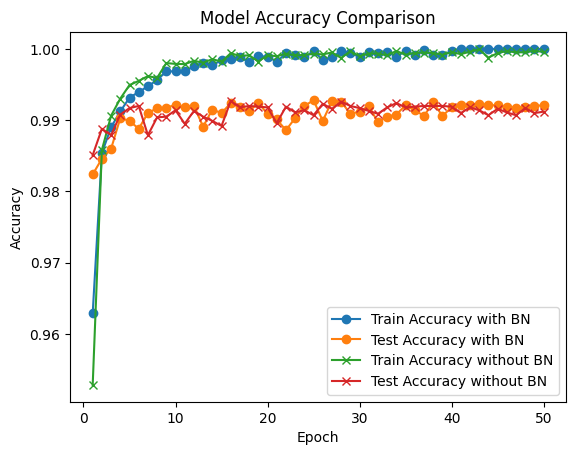

In [10]:
# Plot accuracy
plt.plot(range(1, len(train_acc_bn)+1), train_acc_bn, label='Train Accuracy with BN', marker='o')
plt.plot(range(1, len(test_acc_bn)+1), test_acc_bn, label='Test Accuracy with BN', marker='o')
plt.plot(range(1, len(train_acc_no_bn)+1), train_acc_no_bn, label='Train Accuracy without BN', marker='x')
plt.plot(range(1, len(test_acc_no_bn)+1), test_acc_no_bn, label='Test Accuracy without BN', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

### lol its almost look same. I think i need to train the resnet50 with and without BN (most prob resnet50 without BN will get error due to large magnitude of activation ). I will trian in future not now.